In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from scipy.stats import uniform, binom, norm, poisson, expon, iqr
# import seaborn as sns

In [4]:
import seaborn as sns

In [3]:
amir = pd.read_csv('amir_deals.csv')
amir.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [4]:
#sampling dependent or independent
np.random.seed(10)
amir.sample(5, replace=True) #replace is for picking, if replace is true, then the object is placed back before picking the next object

,Unnamed: 0,product,client,status,amount,num_users
9,10,Product B,Current,Won,5237.24,23
125,126,Product C,Current,Won,4796.13,44
15,16,Product B,Current,Won,4599.65,12
64,65,Product B,Current,Won,1640.06,59
113,114,Product B,Current,Won,3880.07,4


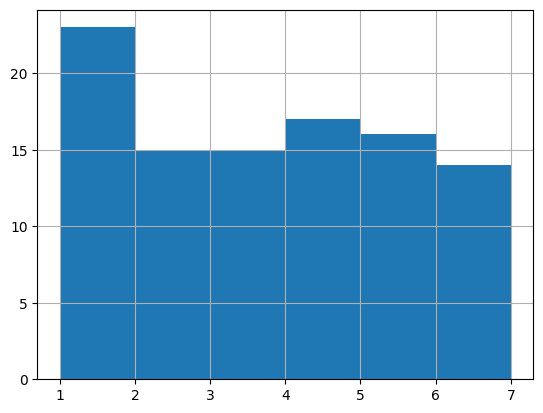

3.3


In [ ]:
#Probability Distributions
np.random.seed(11)
dice = {'num' : [1, 2, 3, 4, 5, 6],
        'prob': [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]}
dice = pd.DataFrame(dice)
dice
ten_rolls = dice.sample(100, replace=True)
ten_rolls['num'].hist(bins=np.linspace(1, 7, 7)) #we use linspace in order to quantile the probabilities based on the dice
plt.show()
print(np.mean(ten_rolls['num'])) #the mean for an even dice is 3.5 Law of Large Numbers

In [42]:
#Continious Distributions
l7 = uniform.cdf(7, 0, 12) #P(x <= 7) = 58%
m7 = 1 - l7 #P(x >= 7) = 42%
b4_7 = uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12) #P(4 <=x <= 7) = 25%
p12 = uniform.cdf(12, 0, 12) #P(0 <= x <= 12) where a = {0, ..., 12} = 100%

rand = uniform.rvs(0, 5, size=10)
rand

array([2.09331715, 1.83808813, 0.84514405, 3.96936203, 4.16518704,
       3.67106494, 4.3764729 , 3.24028221, 3.48033087, 0.9650904 ])

In [60]:
#Binomial Distibution True/False, 0/1
coins = binom.rvs(3, 0.5, size=100) 
coins
#binom.pmf(num_heads, num_trials, prob chance)
print('P(heads = 7) : ', binom.pmf(7, 10, 0.5)) #chance to get 7 heads out of 10 coins = 11.7%
print('P(heads <= 7): ', binom.cdf(7, 10, 0.5)) #7 or fewer heads
print('P(heads) > 7: ', 1 - binom.cdf(7, 10, 0.5))

#Expected Value = n * p
#10 coins * 0.5 probability = 5 expected value
#independence matters

P(heads = 7) :  0.11718750000000004
P(heads <= 7):  0.9453125
P(heads) > 7:  0.0546875


N(x <= 154) : 0.15865525393145707
N(x > 154) : 0.8413447460685429
N(154 < x < 157) : 0.1251993291672192
N(x < 90%) : 169.9708609588122
N(x > 10% ) : 152.0291390411878


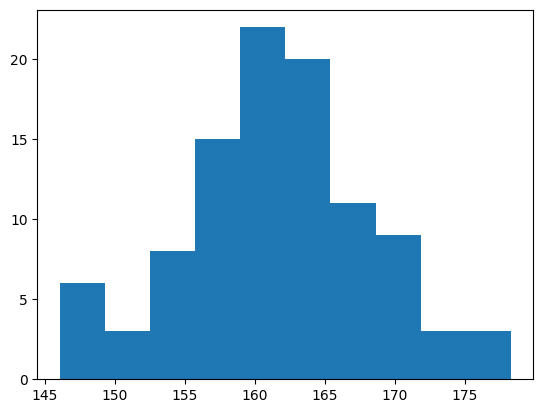

In [79]:
#Normal Distribution
#is described by mean and std
#Standard Normal Distribution => mean = 0, std = 1
np.random.seed(10)
w1 = norm.cdf(154, 161, 7) #=> 16% of women are shorter than 154 cm
print(f'N(x <= 154) : {w1}')
print(f'N(x > 154) : {1 - w1}') # => 84% of women are taller than 154 cm
print(f'N(154 < x < 157) : {norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)}')
print(f'N(x < 90%) : {norm.ppf(0.9, 161, 7)}') #90% of women are shorted than 169 cm
print(f'N(x > 10% ) : {norm.ppf((1-0.9), 161, 7)}') # 90% of women are taller than 152 cm

heights = norm.rvs(161, 7, size = 100) #mean, std, size
plt.hist(heights)
plt.show()

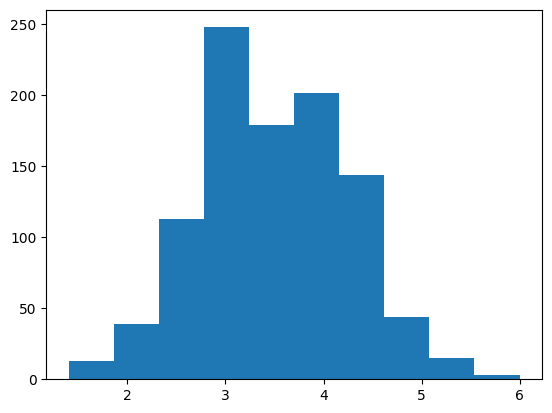

In [88]:
#The Central Limit Theorem or CLT
dice = pd.Series([1, 2, 3, 4, 5, 6])
sample_means = []
for i in range(1000):
    samp = dice.sample(5, replace=True)
    sample_means.append(np.mean(samp))
plt.hist(sample_means) 
#sampling distribution approaches normal distribution
#samples should be random and independent
plt.show()

P(x = 5) when a = [0, ..., 8] : 9.0%
P(x <= 5) when a = [0, ..., 8] : 19.0%
P(x > 5) when a = [0, ..., 8] : 81.0%


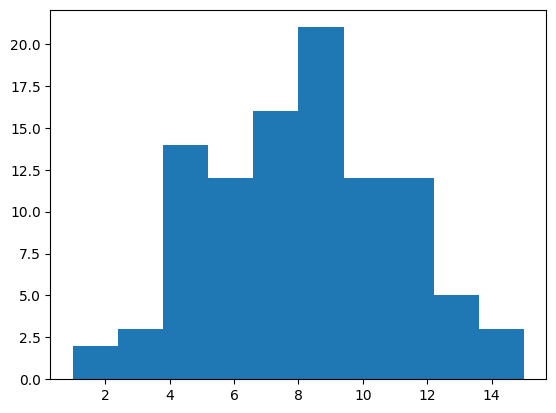

In [99]:
# Poisson Distribution
# is discrete
#Certain rate but completely random
#Lambda => average number of events per time interval

print(f'P(x = 5) when a = [0, ..., 8] : {round(poisson.pmf(5, 8), 2) * 100}%')
print(f'P(x <= 5) when a = [0, ..., 8] : {round(poisson.cdf(5, 8), 2) * 100}%')
print(f'P(x > 5) when a = [0, ..., 8] : {(1 - round(poisson.cdf(5, 8), 2)) * 100}%')

sample_poisson = poisson.rvs(8, size = 100)
sample_poisson
plt.hist(sample_poisson)
plt.show()

In [110]:
#Exponential Distribution
#is continious
#lambda => probability of time between poisson events
#it takes 2 minutes to process an order on average
print(f'P(wait < 1 min) : {round(expon.cdf(1, scale=2), 2) * 100}%')
print(f'P(wait > 4 min) : {round(1 - expon.cdf(4, scale=2), 2) * 100}%')
print(f'P(1 min < wait < 4 min) : {round(expon.cdf(4, scale = 2) - expon.cdf(1, scale=2), 2) * 100}%')

P(wait < 1 min) : 39.0%
P(wait > 4 min) : 14.000000000000002%
P(1 min < wait < 4 min) : 47.0%


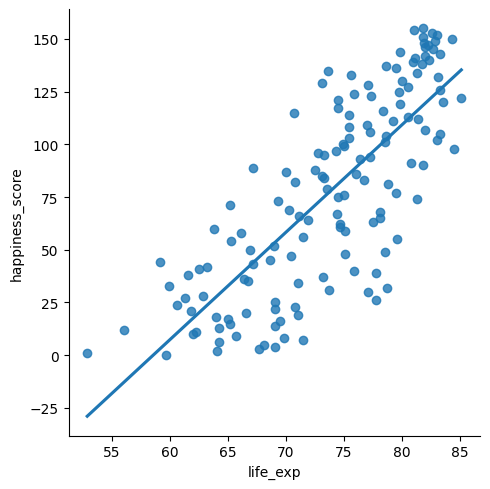

In [11]:
#Seaborn
#Pearson product-moment correlation
happy = pd.read_csv('happy.csv')
happy.head()
sns.lmplot(y = 'happiness_score', x= 'life_exp', data = happy, ci=None)
plt.show()

Correlation between happiness and life expectancy is : 0.7802249053272065


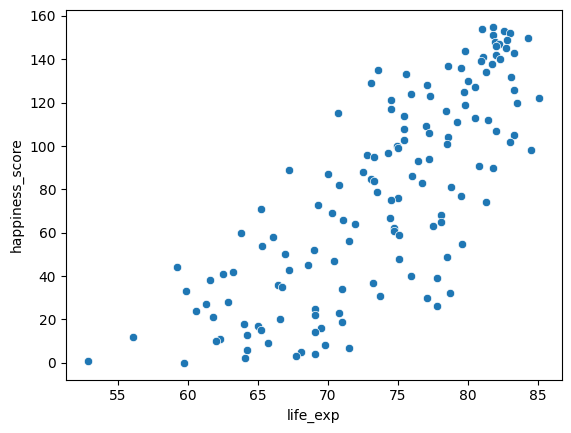

In [14]:
sns.scatterplot(y = 'happiness_score', x= 'life_exp', data = happy)
cor = happy['life_exp'].corr(happy['happiness_score'])
print(f'Correlation between happiness and life expectancy is : {cor}')

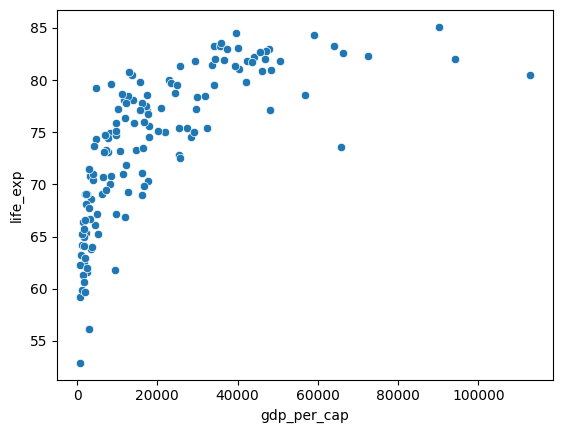

0.7019547642148015


In [18]:
#Transformations to make the relationship linear:
#Log  (log(x))
#Square root (sqrt(x))
#Reciprocal (1/x)
#Combinations of above

#Correlation does not imply causation
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=happy)
# Show plot
plt.show() 
# Correlation between gdp_per_cap and life_exp
cor = happy['gdp_per_cap'].corr(happy['life_exp'])
print(cor)

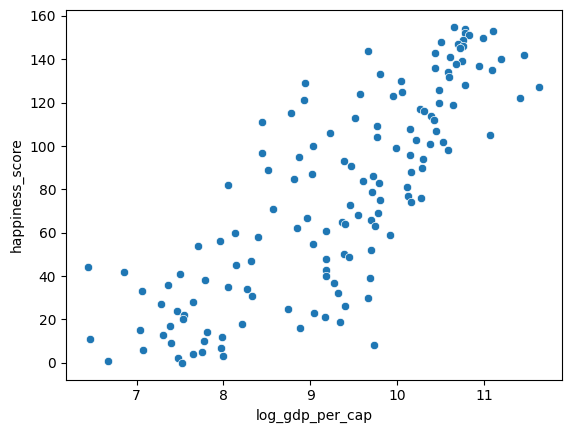

0.8043146004918288


In [19]:
# Create log_gdp_per_cap column
happy['log_gdp_per_cap'] = np.log(happy['gdp_per_cap'])
# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data= happy)
plt.show()
# Calculate correlation
cor = happy['log_gdp_per_cap'].corr(happy['happiness_score'])
print(cor)